In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

import lightgbm as lgb
import optuna

In [47]:
import warnings
warnings.simplefilter("ignore")

# Load Dataset

In [2]:
train_df = pd.read_csv("/kaggle/input/playground-series-s4e6/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s4e6/test.csv")
train_df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


# EDA

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

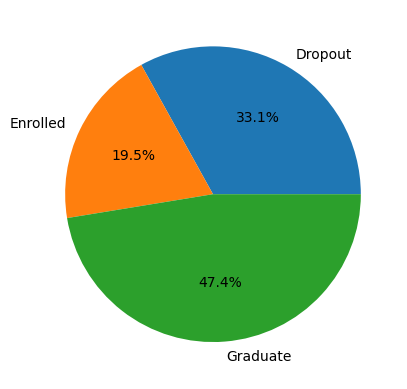

In [33]:
target_labels, target_counts = np.unique(train_df["Target"], return_counts=True)
plt.pie(target_counts, labels=target_labels, autopct="%.1f%%")
plt.show()

In [40]:
labels = list(train_df.columns)
labels.remove("id")
labels.remove("Target")
labels, len(labels)

(['Marital status',
  'Application mode',
  'Application order',
  'Course',
  'Daytime/evening attendance',
  'Previous qualification',
  'Previous qualification (grade)',
  'Nacionality',
  "Mother's qualification",
  "Father's qualification",
  "Mother's occupation",
  "Father's occupation",
  'Admission grade',
  'Displaced',
  'Educational special needs',
  'Debtor',
  'Tuition fees up to date',
  'Gender',
  'Scholarship holder',
  'Age at enrollment',
  'International',
  'Curricular units 1st sem (credited)',
  'Curricular units 1st sem (enrolled)',
  'Curricular units 1st sem (evaluations)',
  'Curricular units 1st sem (approved)',
  'Curricular units 1st sem (grade)',
  'Curricular units 1st sem (without evaluations)',
  'Curricular units 2nd sem (credited)',
  'Curricular units 2nd sem (enrolled)',
  'Curricular units 2nd sem (evaluations)',
  'Curricular units 2nd sem (approved)',
  'Curricular units 2nd sem (grade)',
  'Curricular units 2nd sem (without evaluations)',
  'U

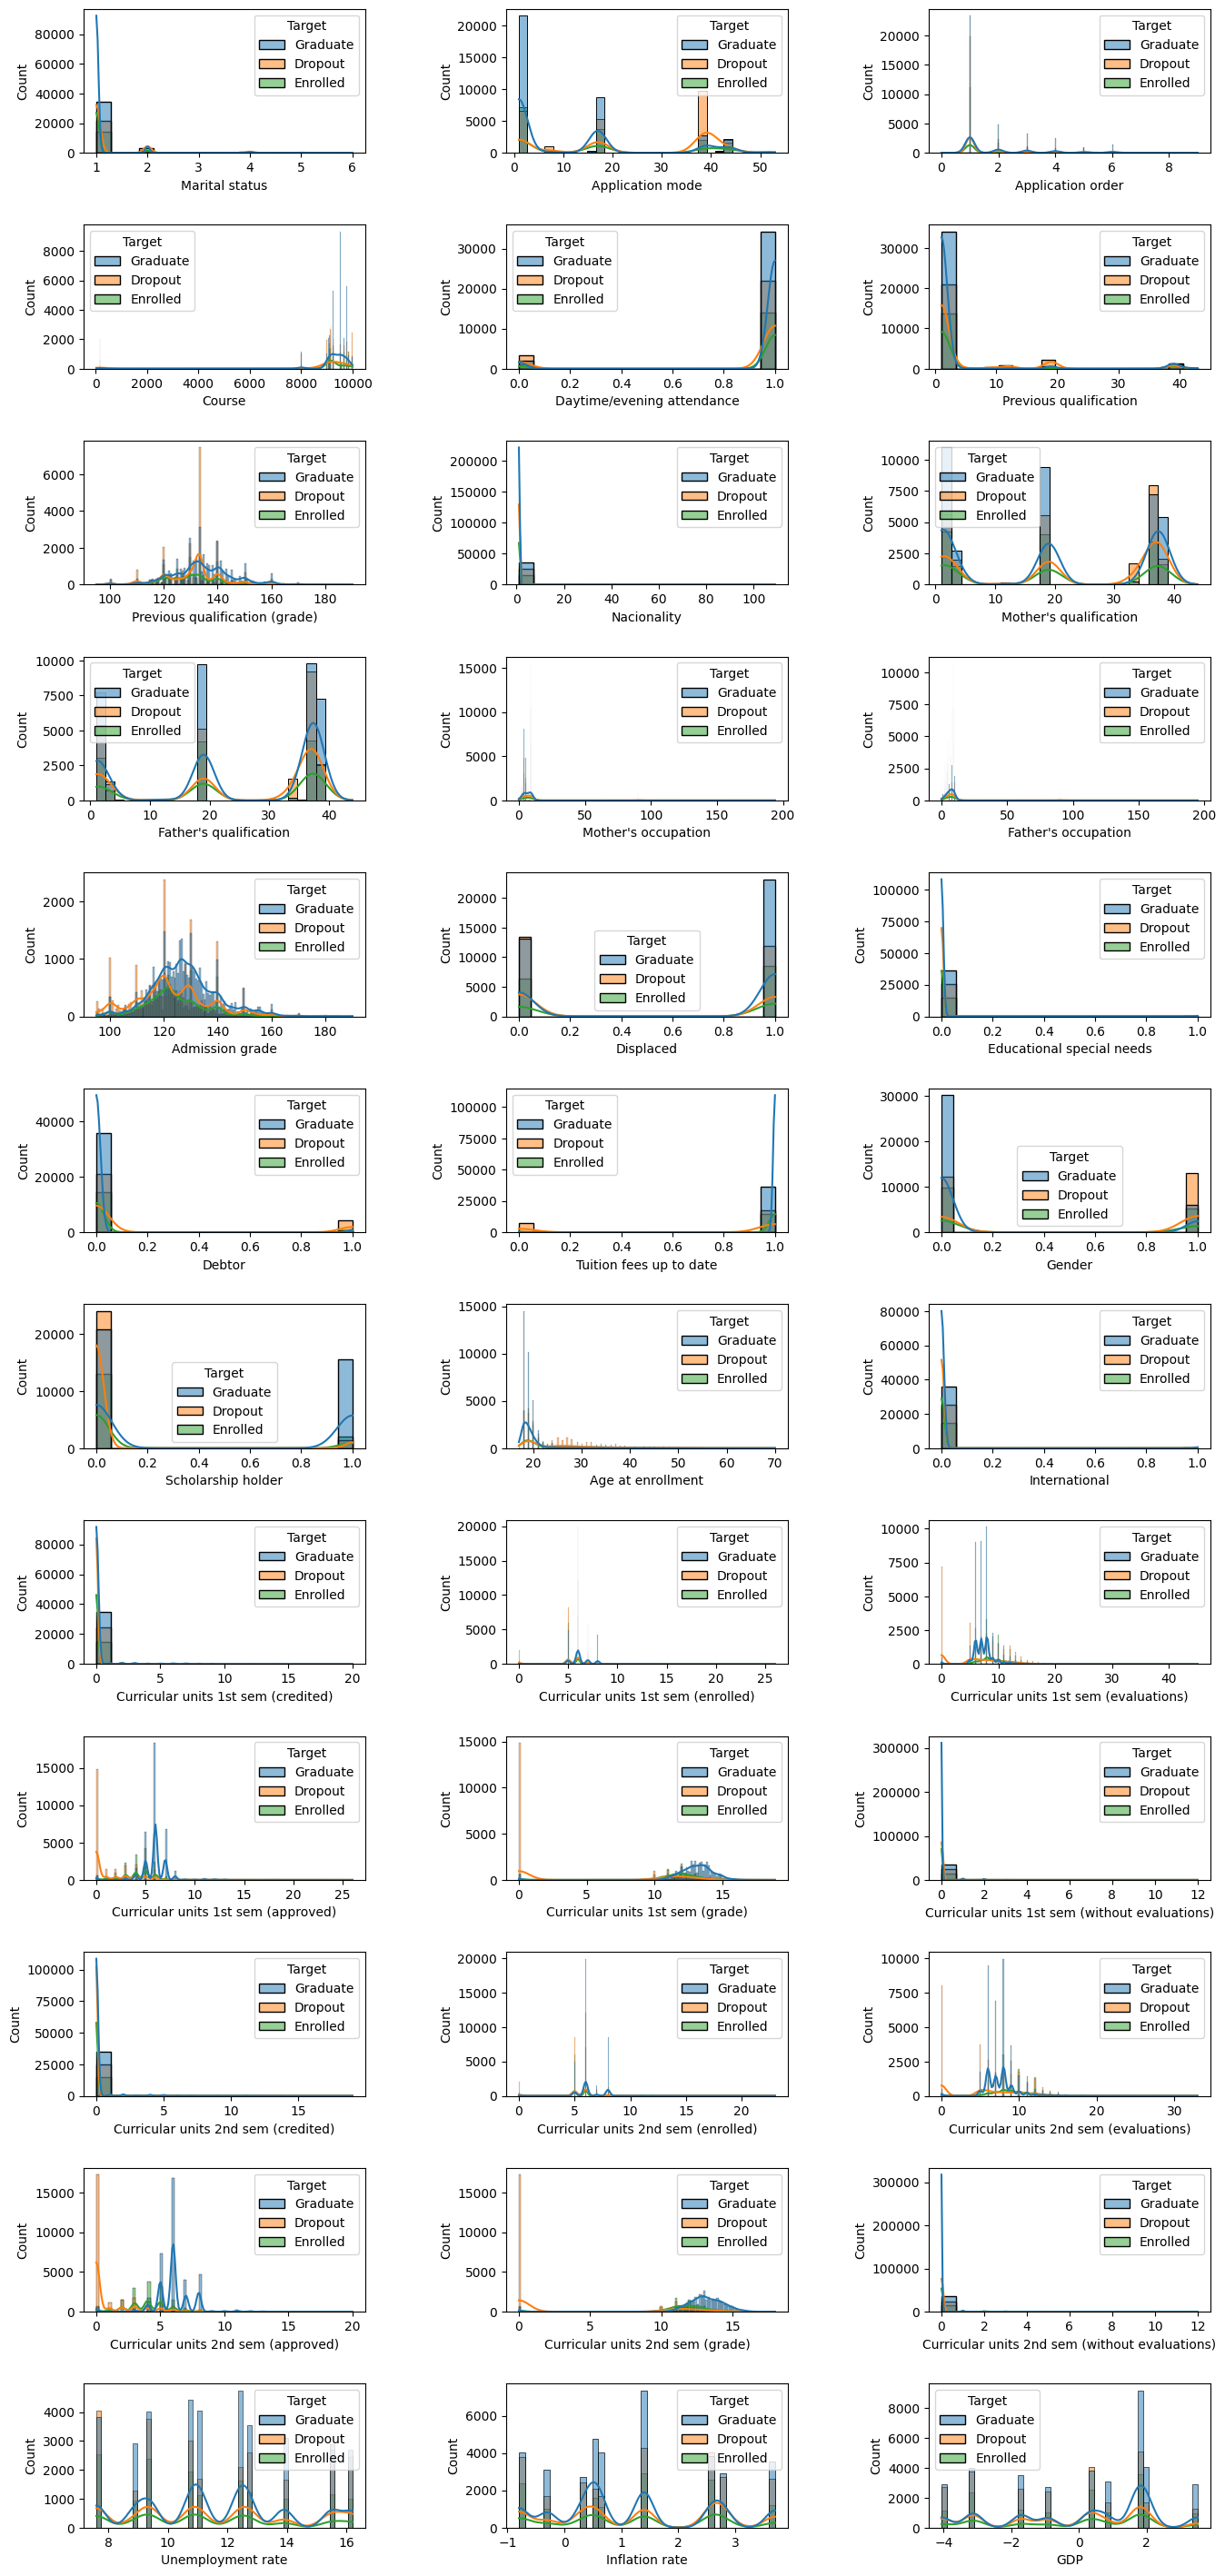

CPU times: user 1min 32s, sys: 30.2 s, total: 2min 2s
Wall time: 1min 16s


In [53]:
%%time
fig = plt.figure(figsize=(16, 36))
axes = [fig.add_subplot(12, 3, i+1) for i in range(len(labels))]
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for ax, label in zip(axes, labels):
    sns.histplot(train_df, x=label, hue="Target", kde=True, ax=ax)
plt.show()

# Feature Engineering

In [100]:
mm = MinMaxScaler()
X = mm.fit_transform(train_df[labels])
Y = train_df["Target"].apply(lambda x: list(target_labels).index(x))

train_x, valid_x, train_y, valid_y = train_test_split(X, Y, test_size=0.2, random_state=42)

test_x = test_df[labels]
test_x = mm.transform(test_x)


print(
f"""
Train Size : {len(train_x)}
Valid Size : {len(valid_x)}
Test  Size : {len(test_x)}
"""
)


Train Size : 61214
Valid Size : 15304
Test  Size : 51012



# Train Models

In [96]:
# params = {
#     "learning_rate": 0.01,
#     "num_leaves": 31,
#     "num_iterations": 500,
#     "seed": 42,
#     "max_depth": -1,
#     "verbose": 0
# }

# gbm = lgb.LGBMClassifier(**params)
# gbm.fit(train_x, train_y)

# pred_y = gbm.predict(valid_x)
# accuracy_score(valid_y, pred_y)

0.8322660742289597

# Tuning

[I 2024-06-09 02:35:13,427] A new study created in memory with name: lightgbm
[I 2024-06-09 02:37:09,239] Trial 0 finished with value: 0.8302098852557568 and parameters: {'learning_rate': 0.05346837492818663, 'num_leaves': 92, 'num_iterations': 379, 'max_depth': 19}. Best is trial 0 with value: 0.8302098852557568.
[I 2024-06-09 02:38:59,086] Trial 1 finished with value: 0.8243550537128519 and parameters: {'learning_rate': 0.006350586675950648, 'num_leaves': 30, 'num_iterations': 344, 'max_depth': 16}. Best is trial 0 with value: 0.8302098852557568.
[I 2024-06-09 02:44:44,103] Trial 2 finished with value: 0.8281711492720667 and parameters: {'learning_rate': 0.0033877664547791357, 'num_leaves': 99, 'num_iterations': 842, 'max_depth': 16}. Best is trial 0 with value: 0.8302098852557568.
[I 2024-06-09 02:48:09,548] Trial 3 finished with value: 0.8260147939047021 and parameters: {'learning_rate': 0.00391673509823565, 'num_leaves': 40, 'num_iterations': 610, 'max_depth': 15}. Best is trial 0

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-06-09 02:57:51,534] Trial 7 finished with value: 0.832640685851695 and parameters: {'learning_rate': 0.06222887327614132, 'num_leaves': 52, 'num_iterations': 763, 'max_depth': 4}. Best is trial 7 with value: 0.832640685851695.
[I 2024-06-09 02:58:09,564] Trial 8 finished with value: 0.6926344128178991 and parameters: {'learning_rate': 0.0028367398024403204, 'num_leaves': 48, 'num_iterations': 51, 'max_depth': 31}. Best is trial 7 with value: 0.832640685851695.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-06-09 03:02:30,257] Trial 9 finished with value: 0.8236362685903971 and parameters: {'learning_rate': 0.002315038130054476, 'num_leaves': 93, 'num_iterations': 715, 'max_depth': 7}. Best is trial 7 with value: 0.832640685851695.
[I 2024-06-09 03:04:41,241] Trial 10 finished with value: 0.8205258893332288 and parameters: {'learning_rate': 0.01835687677620186, 'num_leaves': 65, 'num_iterations': 981, 'max_depth': 1}. Best is trial 7 with value: 0.832640685851695.
[I 2024-06-09 03:06:52,437] Trial 11 finished with value: 0.8317520060639326 and parameters: {'learning_rate': 0.0928800092401875, 'num_leaves': 11, 'num_iterations': 711, 'max_depth': 8}. Best is trial 7 with value: 0.832640685851695.
[I 2024-06-09 03:07:43,617] Trial 12 finished with value: 0.8278444287618599 and parameters: {'learning_rate': 0.027238584201784866, 'num_leaves': 18, 'num_iterations': 182, 'max_depth': 7}. Best is trial 7 with value: 0.832640685851695.
[I 2024-06-09 03:10:27,058] Trial 13 finished with v

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-06-09 03:13:50,036] Trial 15 finished with value: 0.8310985650435192 and parameters: {'learning_rate': 0.09625574014898823, 'num_leaves': 49, 'num_iterations': 234, 'max_depth': 11}. Best is trial 7 with value: 0.832640685851695.
[I 2024-06-09 03:16:02,826] Trial 16 finished with value: 0.8320525889333229 and parameters: {'learning_rate': 0.05104645118473647, 'num_leaves': 29, 'num_iterations': 579, 'max_depth': 11}. Best is trial 7 with value: 0.832640685851695.
[I 2024-06-09 03:18:39,692] Trial 17 finished with value: 0.8312423220680102 and parameters: {'learning_rate': 0.049433775534427106, 'num_leaves': 22, 'num_iterations': 733, 'max_depth': 24}. Best is trial 7 with value: 0.832640685851695.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-06-09 03:22:55,914] Trial 18 finished with value: 0.8305888810475966 and parameters: {'learning_rate': 0.008831710920459928, 'num_leaves': 44, 'num_iterations': 968, 'max_depth': 5}. Best is trial 7 with value: 0.832640685851695.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-06-09 03:26:52,729] Trial 19 finished with value: 0.8316997307822996 and parameters: {'learning_rate': 0.02127936378808677, 'num_leaves': 58, 'num_iterations': 839, 'max_depth': 11}. Best is trial 7 with value: 0.832640685851695.
[I 2024-06-09 03:28:56,854] Trial 20 finished with value: 0.7859980658145795 and parameters: {'learning_rate': 0.0010522914161768945, 'num_leaves': 80, 'num_iterations': 516, 'max_depth': 4}. Best is trial 7 with value: 0.832640685851695.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-06-09 03:31:17,025] Trial 21 finished with value: 0.8314906296557673 and parameters: {'learning_rate': 0.052241874090000355, 'num_leaves': 32, 'num_iterations': 609, 'max_depth': 12}. Best is trial 7 with value: 0.832640685851695.
[I 2024-06-09 03:33:13,196] Trial 22 finished with value: 0.8316605243210747 and parameters: {'learning_rate': 0.06729960936106466, 'num_leaves': 25, 'num_iterations': 533, 'max_depth': 13}. Best is trial 7 with value: 0.832640685851695.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-06-09 03:36:03,177] Trial 23 finished with value: 0.8323139653414883 and parameters: {'learning_rate': 0.03507235477912377, 'num_leaves': 39, 'num_iterations': 670, 'max_depth': 10}. Best is trial 7 with value: 0.832640685851695.


{'learning_rate': 0.06222887327614132,
 'num_leaves': 52,
 'num_iterations': 763,
 'max_depth': 4}

In [133]:
tuning = False
N_SPLITS = 5
def lgb_objective(trial: optuna.Trial) -> float:
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 10, 100),
        "num_iterations": trial.suggest_int("num_iterations", 30, 1000),
        "max_depth": trial.suggest_int("max_depth", 1, 31),
        "seed": 42,
        "verbose": 0
    }

    cv = np.zeros_like(Y)
    kf = StratifiedKFold(n_splits=N_SPLITS, random_state=42, shuffle=True)
    for i, (train_idx, valid_idx) in enumerate(kf.split(X, Y)):
        train_x, train_y = X[train_idx, :], Y[train_idx]
        valid_x, valid_y = X[valid_idx, :], Y[valid_idx]

        model = lgb.LGBMClassifier(**params)
        model.fit(train_x, train_y)

        cv[valid_idx] = model.predict(valid_x)

    return accuracy_score(y_true=Y, y_pred=cv)


if tuning:
    study = optuna.create_study(study_name="lightgbm", direction="maximize")
    study.optimize(lgb_objective, timeout=3600)
    best_params = study.best_params

else:
    best_params = {
        'learning_rate': 0.06222887327614132,
        'num_leaves': 52,
        'num_iterations': 763,
        'max_depth': 4
    }

    
const_params = {
    "seed": 42,
    "verbose": 0
}

params = dict(**const_params, **best_params)

models = []
cv_pred = np.zeros_like(Y)
kf = StratifiedKFold(n_splits=N_SPLITS, random_state=42, shuffle=True)
for i, (train_idx, valid_idx) in enumerate(kf.split(X, Y)):
    train_x, train_y = X[train_idx, :], Y[train_idx]
    valid_x, valid_y = X[valid_idx, :], Y[valid_idx]

    model = lgb.LGBMClassifier(**params)
    model.fit(train_x, train_y)

    cv_pred[valid_idx] = model.predict(valid_x)
    models.append(model)

print(accuracy_score(Y, cv_pred))

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [134]:
results = []
for model in models:
    r = model.predict_proba(test_x)
    results.append(r)

In [135]:
pred = np.mean(results, axis=0)
pred = np.argmax(pred, axis=1)
pred = [target_labels[i] for i in pred]
test_id = test_df["id"]
print(len(test_id), len(pred))
submission = pd.DataFrame({
    "id": test_id,
    "Target": pred
})
submission.to_csv("submission.csv", index=False)

51012 51012
